<a href="https://colab.research.google.com/github/Clarkdrengen/PML_2023/blob/main/MNIST_data_wrangling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pyro-ppl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 730.7/730.7 KB 9.5 MB/s eta 0:00:00


In [2]:
import torch
import torchvision
import pyro
import pyro.distributions as dist

In [3]:
# Load MNIST dataset
transform = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize((0.1307,), (0.3081,))
])
train_data = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_data = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

100%|██████████| 9912422/9912422 [00:00<00:00, 96362309.70it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 23883220.39it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 26267500.47it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 5351272.13it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [4]:
# Flatten and normalize images
x_train = train_data.data.float().view(-1, 784) / 255.0
x_test = test_data.data.float().view(-1, 784) / 255.0

In [5]:
import matplotlib.pyplot as plt

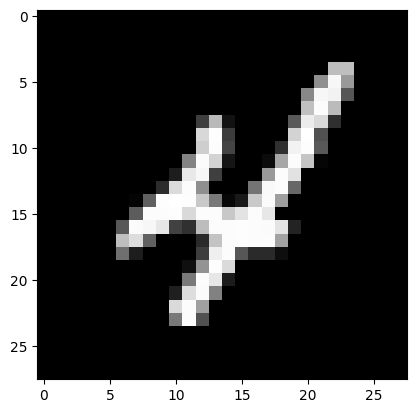

In [6]:
# sample image
plt.imshow(x_train[9].reshape(28,28), cmap="gray")

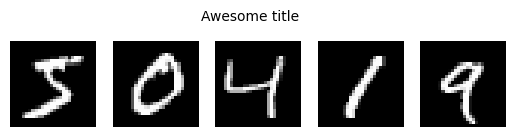

In [8]:
# show 4x4 images
images = x_train[:5].reshape((-1, 28, 28))  # se

fig, axes = plt.subplots(nrows=1, ncols=5)  # create a 4x4 grid of subplots
for i, ax in enumerate(axes.flat):
    ax.imshow(images[i], cmap='gray')  # display image on the current subplot

[axi.set_axis_off() for axi in axes.ravel()] # kill axes h/t https://stackoverflow.com/questions/25862026/turn-off-axes-in-subplots
fig.suptitle('Awesome title', fontsize=10, y=.65) # awesome title h/t https://www.geeksforgeeks.org/how-to-set-a-single-main-title-for-all-the-subplots-in-matplotlib/
plt.show()